# Xue & Leibler, PNAS 2016

At each generation:

1. individuals develop a phenotype according to their phenotype distribution $\pi$: $\pi_i \in [0,1]$ is the probability that a specific individual will develop to phenotype $\phi_i$.
1. the fitness of individuals is set according to their phenotype and the environment $\epsilon \in {0, 1}$.
. individuals reproduce: the relative contribution (fitness) of individuals with phenotype $\phi_i$ in environment $\epsilon_j$ to the next generation is $\frac{\omega_i^{(j)}}{\sum_k{\phi_k^j}}$.
1. each offspring phenotype distribution is inherited from its parent, where a fraction $1-\eta$ is determined according to the parent phenotype distribution and a fraction $\eta$ is determined according to the parent phenotype; the offspring distribution is $\pi_i' = (1-\eta)\phi_i + \eta * \delta_{i,k}$, where $k$ is the parent phenotype.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='ticks', context='paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)
from simulation import *

/Users/yoavram/miniconda3/envs/Xue2016/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Figure 2

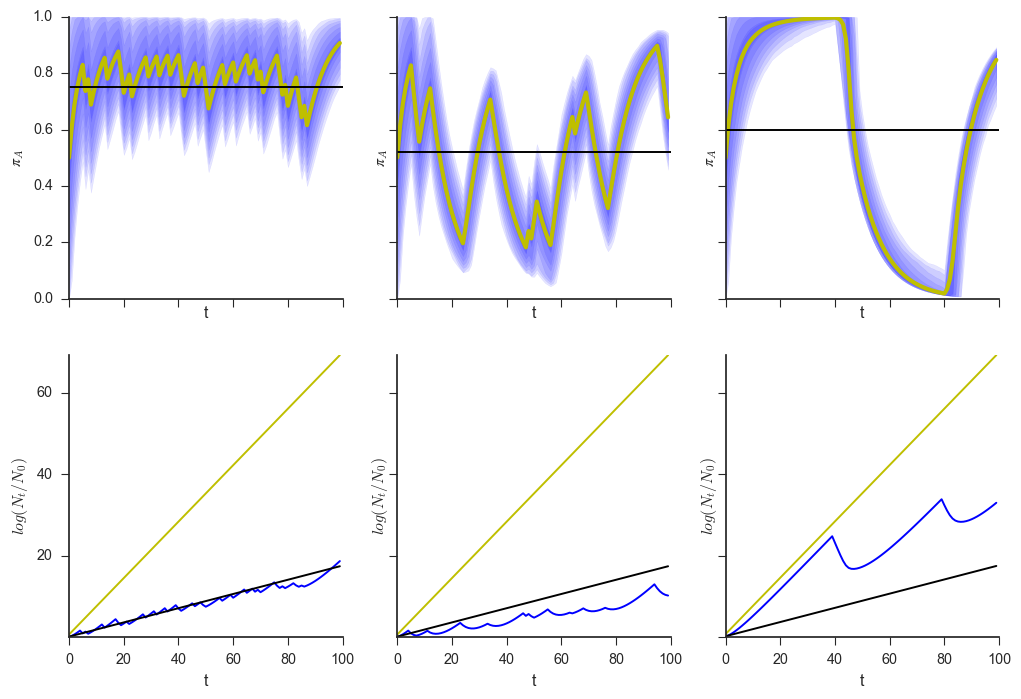

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey='row')

N=100000
n=100
η=0.1
μ=0
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π = simulation(N, n, η, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_logNtN0(π, ω0, ω1, 0.7, ϵ, ax=ax[1,0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π = simulation(N, n, η, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0,1])
plot_logNtN0(π, ω0, ω1, 0.7, ϵ, ax=ax[1,1])

## Fig. 2C
ϵ = np.array([0] * 40 + [1] * 40 + [0] * 20)
π = simulation(N, n, η, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0,2])
plot_logNtN0(π, ω0, ω1, 0.7, ϵ, ax=ax[1,2]);

# Modifier competitions in Fig. 2

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

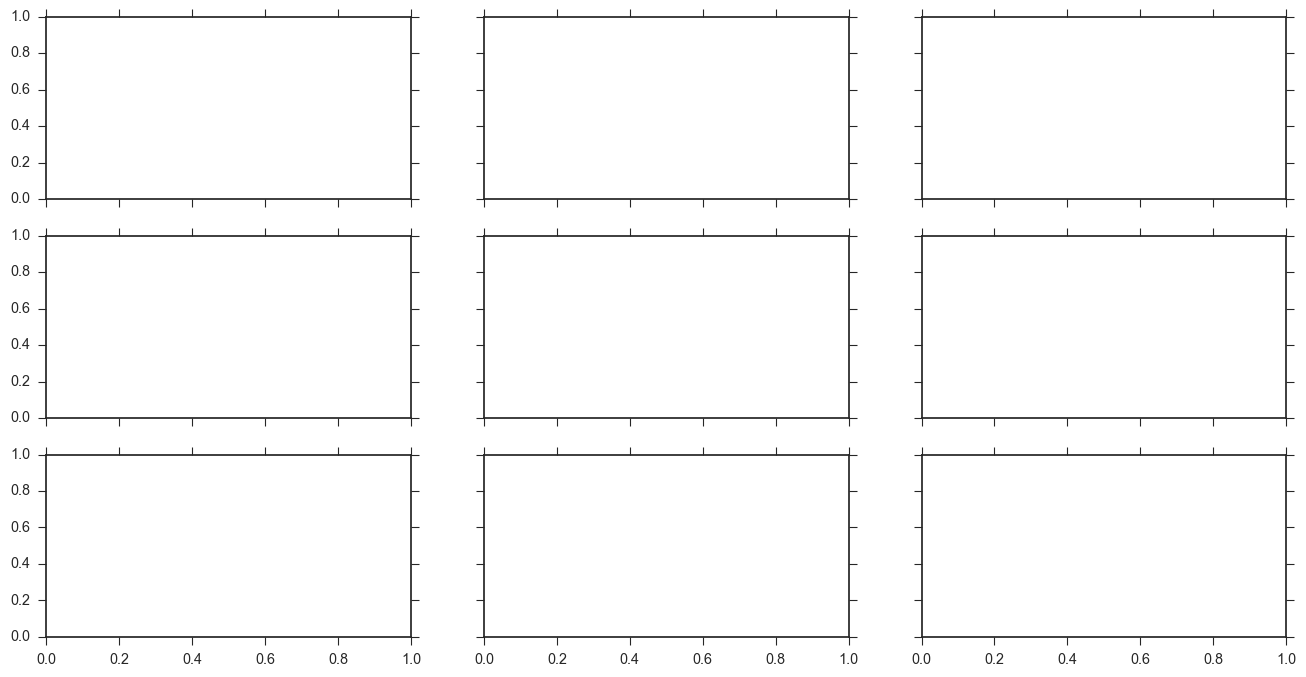

In [2]:
fig, ax = plt.subplots(3, 3, figsize=(16, 8), sharex=True, sharey='row')

N=100000
n=500
η1=0.1
η2=0.2
μ1=0
μ2=0
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π, η_bar, μ_bar= simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_η(η_bar, η1, η2, ax=ax[1, 0])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0, 1])
plot_η(η_bar, η1, η2, ax=ax[1, 1])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 1])

## Fig. 2C
ϵ = np.array(([0] * 40 + [1] * 40) * (n//80 + 1))
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0, 2])
plot_η(η_bar, η1, η2, ax=ax[1, 2])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 2])

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(16, 8), sharex=True, sharey='row')

N=100000
n=500
η1=0.1
η2=0
μ1=0
μ2=0.1
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5
κ = 0

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π, η_bar, μ_bar= simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_η(η_bar, η1, η2, ax=ax[1, 0])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 1])
plot_η(η_bar, η1, η2, ax=ax[1, 1])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 1])

## Fig. 2C
ϵ = np.array(([0] * 40 + [1] * 40) * (n//80 + 1))
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 2])
plot_η(η_bar, η1, η2, ax=ax[1, 2])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 2])

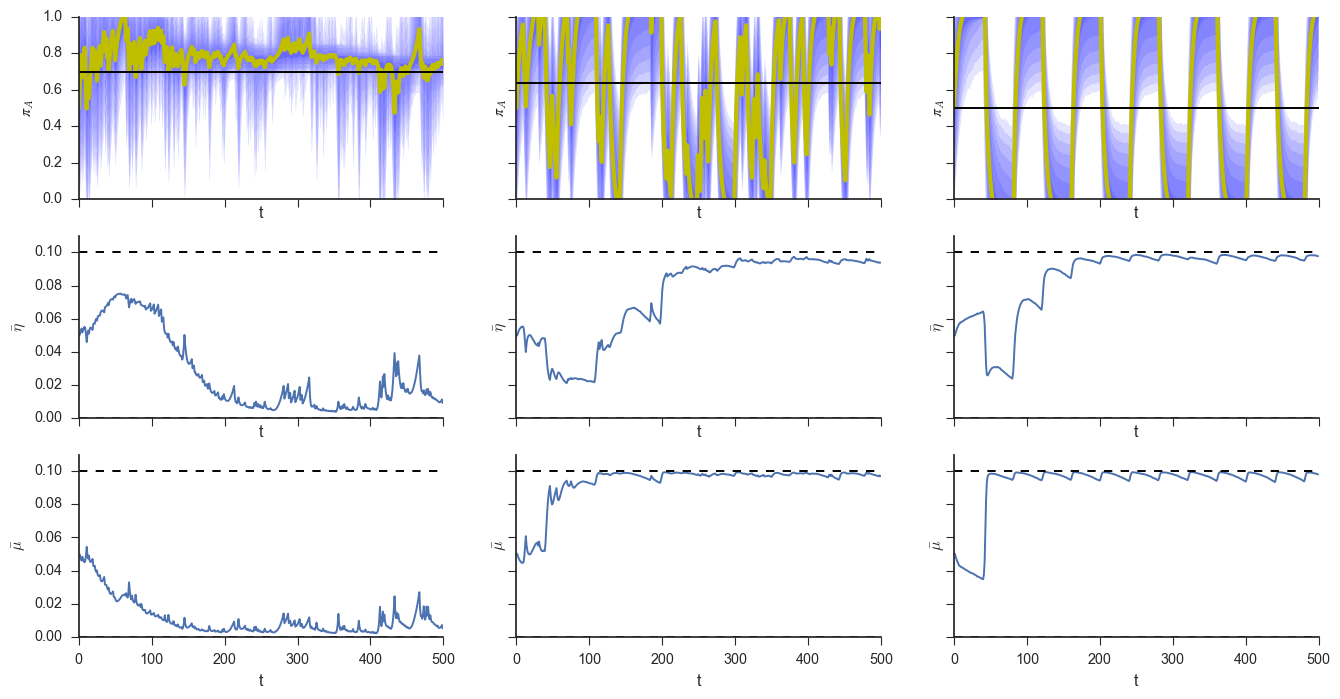

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(16, 8), sharex=True, sharey='row')

N=100000
n=500
η1=0.1
η2=0
μ1=0
μ2=0.1
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5
κ = 0.001

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π, η_bar, μ_bar= simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_η(η_bar, η1, η2, ax=ax[1, 0])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 1])
plot_η(η_bar, η1, η2, ax=ax[1, 1])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 1])

## Fig. 2C
ϵ = np.array(([0] * 40 + [1] * 40) * (n//80 + 1))
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 2])
plot_η(η_bar, η1, η2, ax=ax[1, 2])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 2])

## Multiple simulations

Simuations ran with:

```
python simulation.py --N 100000 --n 500 --η1 0.1 --η2 0.2 --ω0 2.0 --ω1 0.2  --π0 0.5  --env A
```
and results were saved to `output` folder.

In [2]:
import glob
import os
import gzip
import warnings
import json

In [3]:
πs = []
for filename in glob.glob(os.path.join('output', 'π_*')):
    with gzip.open(filename, 'r') as f:
        πs.append( np.loadtxt(f, delimiter=', ') )
πs = np.array(πs)

In [70]:
ϵs = []
for filename in glob.glob(os.path.join('output', 'ϵ_*')):
    with gzip.open(filename, 'r') as f:
        ϵs.append( np.loadtxt(f, delimiter=', ', dtype=float) )

In [5]:
ηs = []
for filename in glob.glob(os.path.join('output', 'η_*')):
    with gzip.open(filename, 'r') as f:
        ηs.append( np.loadtxt(f, delimiter=', ') )    
ηs = np.array(ηs)

In [7]:
params = []
for filename in glob.glob(os.path.join('output', 'params_*')):
    with open(filename, 'r') as f:
        params.append( json.load(f) )

In [39]:
envs = np.array([p['env'] for p in params])
η1s = np.array([float(p['η1']) for p in params])
η2s = np.array([float(p['η2']) for p in params])

In [41]:
assert len(np.unique(η1s)) == 1
assert len(np.unique(η2s)) == 1
η1 = η1s[0]
η2 = η2s[0]

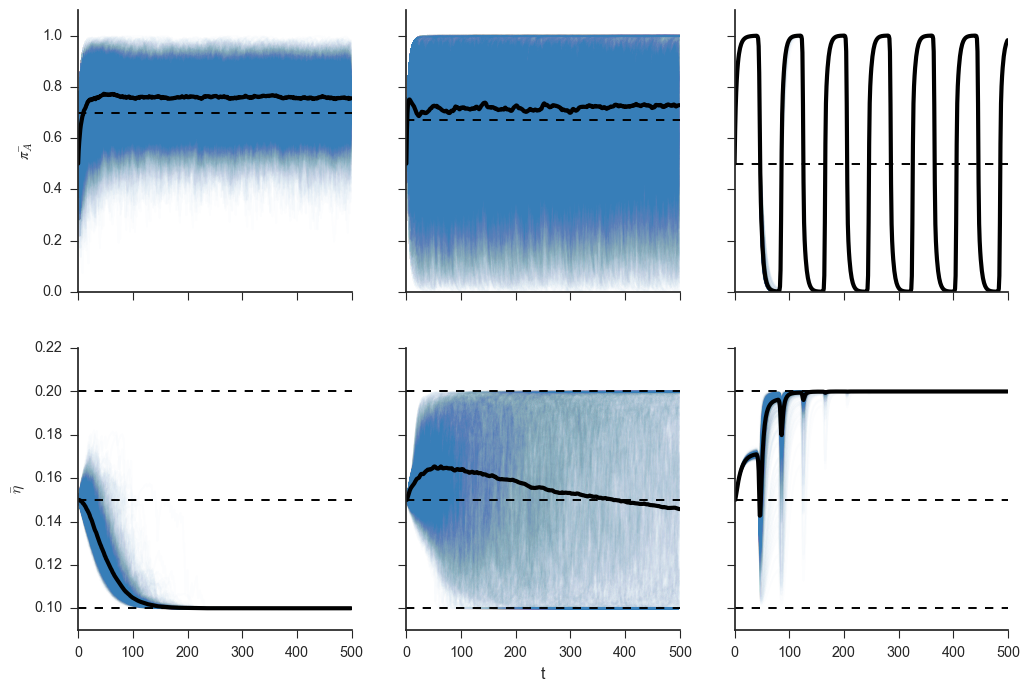

In [91]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey='row')

for i, env in enumerate(('A', 'B', 'C')):
    ax[0, i].plot(πs[envs==env, :].T, color=blue, alpha=0.01)
    ax[0, i].plot(πs[envs==env, :].mean(axis=0), lw=3, color='k', ls='-')
    p0 = np.mean([1 - x.mean() for i, x in enumerate(ϵs) if envs[i] == env])
    ax[0, i].axhline(p0, color='k', ls='--')
    ax[1, i].plot(ηs[envs==env, :].T, color=blue, alpha=0.01)
    ax[1, i].plot(ηs[envs==env, :].mean(axis=0), lw=3, color='k', ls='-')
    ax[1, i].axhline(η1, color='k', ls='--')
    ax[1, i].axhline(η2, color='k', ls='--')
    ax[1, i].axhline((η1 + η2)/2, color='k', ls='--')
ax[0,0].set(
    ylim=(0, 1.1),
    ylabel=r'$\bar{π_A}$'
)
ax[1,0].set(
    ylabel=r'$\bar{\eta}$',
    ylim=(0.9 * η1, η2 * 1.1)
)
ax[1,1].set(
    xlabel='t'
)
sns.despine()

In [92]:
fig.savefig("modifier_competition_1000.png")